In [1]:
from roboverse.envs.sawyer_grasp_v2 import SawyerGraspV2Env
import gym
import matplotlib.pyplot as plt
import roboverse.bullet as bullet
import pickle
import roboverse
import time
import numpy as np


In [2]:
env = roboverse.make("SawyerGraspOneV2-v0",gui=False, observation_mode='pixels_debug')
obs = env.reset()

In [8]:
data = obs['image'].reshape(48,48,3)
print(data.shape)

(48, 48, 3)


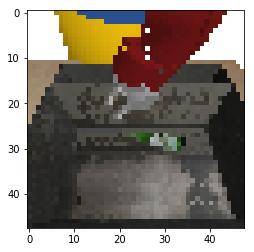

In [9]:
plt.imshow(data)

In [25]:
obs = env.step([0.1,0.1,0.1,0])

In [26]:
obs

({'state': array([ 0.6605225 ,  0.11326029, -0.26030361,  0.86172875, -0.43267937,
          0.10382656,  0.24378715,  0.04185276,  0.68108356,  0.17560681,
         -0.3399104 ,  0.23867651, -0.12778988,  0.9471331 ,  0.17216899]),
  'image': array([1.        , 1.        , 1.        , ..., 0.13333334, 0.14117648,
         0.13725491], dtype=float32)},
 -1.0,
 False,
 {'grasp_success': 0.0})

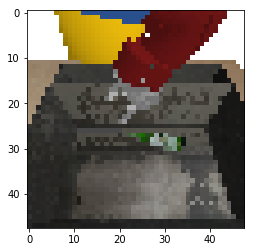

In [11]:
data = obs[0]['image'].reshape(48,48,3)
plt.imshow(data)

In [12]:
buffer = '/home/asap7772/data_collect/kuka_new/railrl_consolidated.pkl'

with open(buffer, 'rb') as f:
    replay_buffer1 = pickle.load(f)
print(buffer)

/home/asap7772/data_collect/kuka_new/railrl_consolidated.pkl


(132000, 6912)
(132000, 6912)


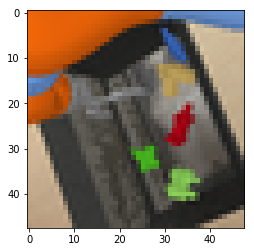

In [114]:
print(replay_buffer1._obs['image'].shape)
new_obs = replay_buffer1._obs['image'].np_array.reshape(-1,48,48,3).T
new_obs = np.rot90(new_obs,3,axes=(-3,-2))
new_obs = np.rollaxis(new_obs,3)
new_obs = new_obs.reshape(new_obs.shape[0], -1)
print(new_obs.shape)

plt.imshow(new_obs[0].reshape(3,48,48).T)

In [2]:
buffer2 = '/home/asap7772/data_collect/widowx200/2020-08-13T02-07-57/2020-08-13T02-07-57_pool_1000001.pkl'

with open(buffer2, 'rb') as f:
    replay_buffer2 = pickle.load(f)
print(buffer2)

KeyboardInterrupt: 

In [ ]:
plt.imshow(replay_buffer2._obs['image'][0].reshape(3,48,48).T)